In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data = sm.datasets.get_rdataset("dietox", "geepack").data   
data.drop(columns=["Evit","Cu"],inplace=True)
data=data[~data["Feed"].isna()]
data

,Pig,Litter,Start,Weight,Feed,Time
1,4601,1,26.5,27.59999,5.200005,2
2,4601,1,26.5,36.50000,17.600000,3
3,4601,1,26.5,40.29999,28.500000,4
4,4601,1,26.5,49.09998,45.200001,5
5,4601,1,26.5,55.39999,56.900002,6
...,...,...,...,...,...,...
856,8442,24,25.7,73.19995,83.800003,8
857,8442,24,25.7,81.69995,99.800003,9
858,8442,24,25.7,90.29999,115.200001,10
859,8442,24,25.7,96.00000,133.200001,11


In [3]:
data.Pig.value_counts() # son muchos pigs, agruparlos por  numero inicial

Pig
4601    11
4602    11
6912    11
6910    11
6909    11
        ..
5497    11
5392    11
5528    10
5524    10
5527    10
Name: count, Length: 72, dtype: int64

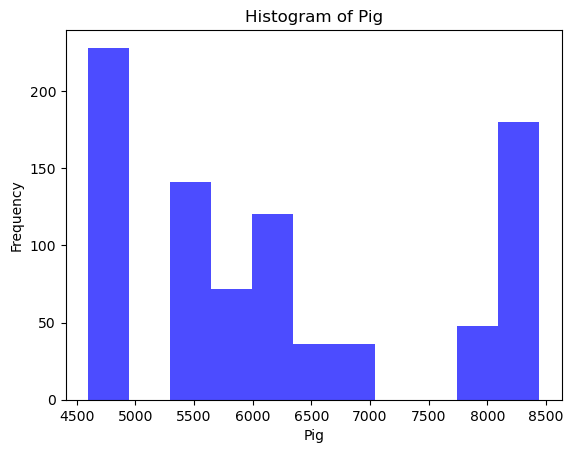

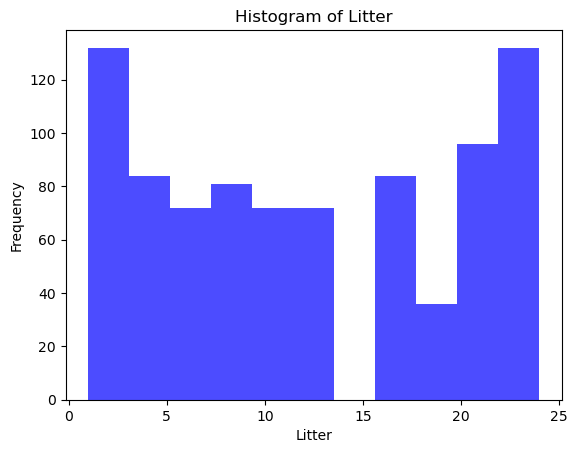

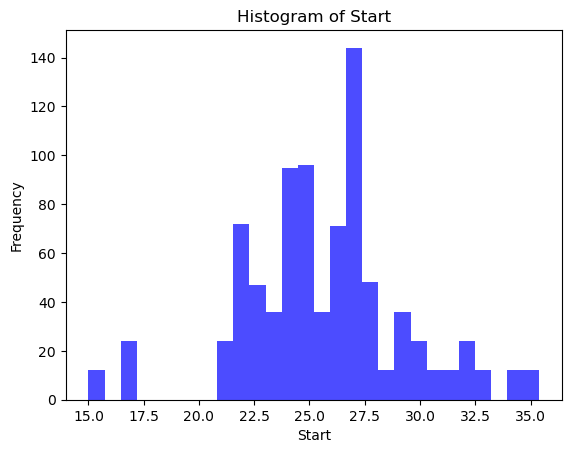

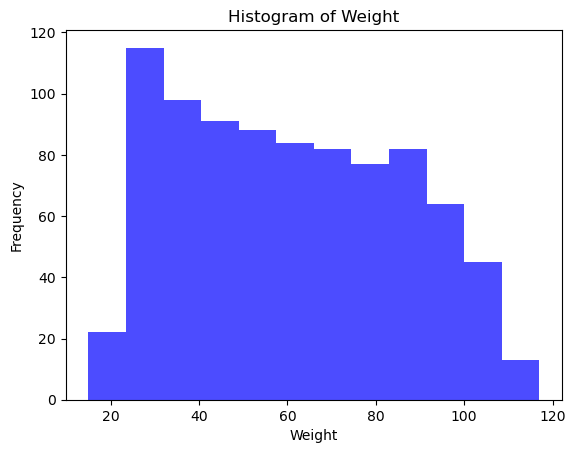

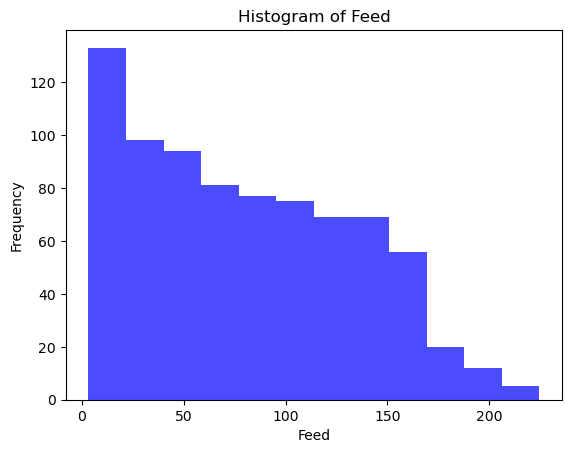

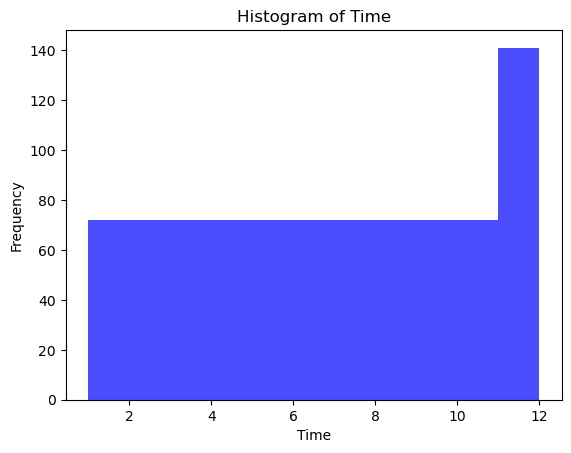

In [13]:
for column in data.columns:
    plt.hist(data[column], bins='auto', alpha=0.7, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Efectos fijos
**Regresión normal**

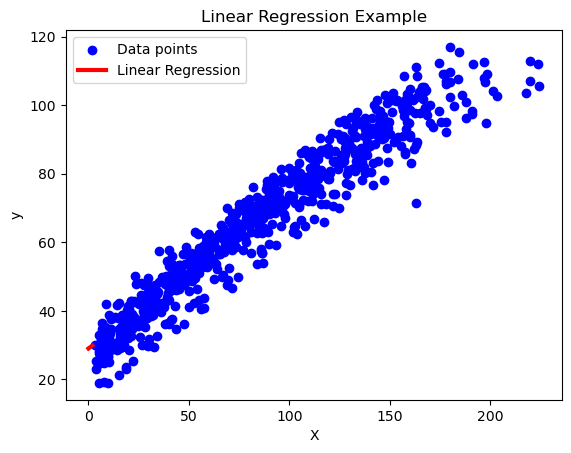

In [18]:
X=np.array(data["Feed"]).reshape(-1, 1) 
y=np.array(data["Weight"])
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions using the model
X_new = np.array([[0], [2]])
y_pred = model.predict(X_new)

# Visualize the data and regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_pred, color='red', linewidth=3, label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Example')
plt.show()


In [24]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


# Using scikit-learn to fit the model
X = np.array(data["Feed"]).reshape(-1, 1)
y = np.array(data["Weight"])
model = LinearRegression()
model.fit(X, y)

# Using statsmodels for model summary
X_with_intercept = sm.add_constant(X)  # Add a constant term to the independent variable matrix
model_sm = sm.OLS(y, X_with_intercept).fit()

# Print the summary
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.162e+04
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:48:16   Log-Likelihood:                -2525.4
No. Observations:                 789   AIC:                             5055.
Df Residuals:                     787   BIC:                             5064.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0481      0.387     75.125      0.0

In [20]:
# Get the coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the equation of the fitted line
print(f"Equation of the fitted line: Weight = {intercept:.4f} + {slope:.4f} * Feed ")

# Get the R-squared value
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

Equation of the fitted line: Weight = 29.0481 + 0.4320 * Feed 
R-squared: 0.9366


## Por grupo (pigs)

Se crea variable de "establo" o agrupación por pigs

In [29]:
data['Prefix'] = data['Pig'].astype(str).str[:1].astype(int)
data.Prefix.value_counts()

C:\Users\Hugo\AppData\Local\Temp\ipykernel_10176\1420022029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prefix'] = data['Pig'].astype(str).str[:1].astype(int)


Prefix
4    209
8    209
5    195
6    176
Name: count, dtype: int64

In [47]:
# Using scikit-learn to fit the model
data4=data[data.Prefix==4]
data8=data[data.Prefix==8]
data5=data[data.Prefix==5]
data6=data[data.Prefix==6]

pigs=[data4,data5,data6,data8]
nums=[4,5,6,8]

for pig,e in zip(pigs,nums):
    
    X = np.array(pig["Feed"]).reshape(-1, 1)
    y = np.array(pig["Weight"])
    model = LinearRegression()
    model.fit(X, y)

    # Using statsmodels for model summary
    X_with_intercept = sm.add_constant(X)  # Add a constant term to the independent variable matrix
    model_sm = sm.OLS(y, X_with_intercept).fit()

    # Print the summary
    print(f"Grupo {e}")
    print(model_sm.summary())

    # Get the R-squared value
    print(f"R-squared: {r_squared:.4f}")
    print("####################################################################################################")

Grupo 4
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     3007.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):          3.05e-125
Time:                        18:09:46   Log-Likelihood:                -668.46
No. Observations:                 209   AIC:                             1341.
Df Residuals:                     207   BIC:                             1348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6718      0.756     39.261 

# Mixed effects

In [40]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

md = smf.mixedlm("Weight ~ Feed", data, groups=data["Prefix"])

mdf = md.fit()

print(mdf.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 789     Method:             REML      
No. Groups:       4       Scale:              31.3531   
Min. group size:  176     Log-Likelihood:     -2488.5020
Max. group size:  209     Converged:          Yes       
Mean group size:  197.2                                 
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    29.153    1.257  23.188 0.000 26.689 31.617
Feed          0.432    0.004 114.480 0.000  0.425  0.440
Group Var     5.792    0.871                            



In [41]:
# Obtener los efectos aleatorios
random_effects = mdf.random_effects

# Mostrar los efectos aleatorios
print("Efectos Aleatorios:")
print(random_effects)

Efectos Aleatorios:
{4: Group   -0.531148
dtype: float64, 5: Group   -1.760993
dtype: float64, 6: Group    3.480703
dtype: float64, 8: Group   -1.188563
dtype: float64}


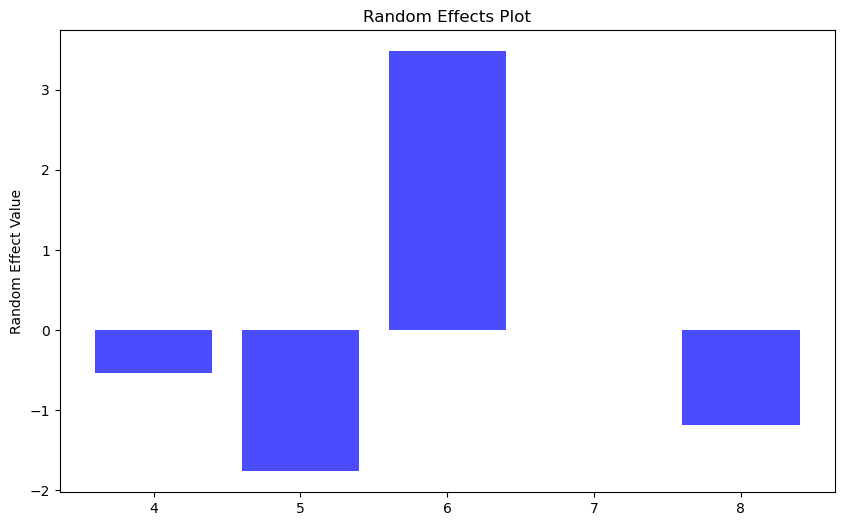

In [46]:
# Visualizar efectos aleatorios
fig, ax = plt.subplots(figsize=(10, 6))

# Extraer los efectos aleatorios
ranef = mdf.random_effects

# Graficar efectos aleatorios
for group, values in ranef.items():
    ax.bar(x=group, height=values['Group'], color='blue', alpha=0.7)

ax.set_ylabel('Random Effect Value')
ax.set_title('Random Effects Plot')

plt.show()